# Linear Regression

Linear regression is a fundamental and widely used statistical technique in data analysis and machine learning. It is a powerful tool for **modeling and understanding the relationships between variables** and **make predictions on unseen data**. At its core, linear regression aims to model a linear relationship between a **dependent variable** (the one you want to predict) and **one or more independent variables** (the ones used for prediction). This technique allows us to make predictions, infer associations, and gain insights into how changes in independent variables influence the target variable. Linear regression is both intuitive and versatile, making it a valuable tool for tasks ranging from simple trend analysis to more complex predictive modeling and hypothesis testing. 

In this context, we will explore the concepts and applications of linear regression, its different types, and how to implement it using Python.

## The Auto MPG Dataset

We will consider the [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg) dataset, which contains $398$ measurements of $8$ different properties of different cars:

In [24]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
auto_mpg = fetch_ucirepo(id=9) 
  
# data (as pandas dataframes) 
X = auto_mpg.data.features 
y = auto_mpg.data.targets 
  
data = X.join(y)
data


,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,140.0,4,86.0,2790,15.6,82,1,27.0
394,97.0,4,52.0,2130,24.6,82,2,44.0
395,135.0,4,84.0,2295,11.6,82,1,32.0
396,120.0,4,79.0,2625,18.6,82,1,28.0


Here is a description of the different variables:

* **Displacement**: The engine's displacement (in cubic inches), which indicates the engine's size and power.
* **Cylinders**: The number of cylinders in the engine of the car. This is a categorical variable.
* **Horsepower**: The engine's horsepower, a measure of the engine's performance.
* **Weight**: The weight of the car in pounds.
* **Acceleration**: The car's acceleration (in seconds) from 0 to 60 miles per hour.
* **Model Year**: The year the car was manufactured. This is often converted into a categorical variable representing the car's age.
* **Origin**: The car's country of origin or manufacturing.
Car Name: The name or identifier of the car model.
* **MPG (Miles per Gallon)**: The fuel efficiency of the car in miles per gallon. It is the variable to be predicted in regression analysis.

We will start by exploring the relationship between the variables `horsepower` and `MPG`. Let's visualize the related scatterplot:

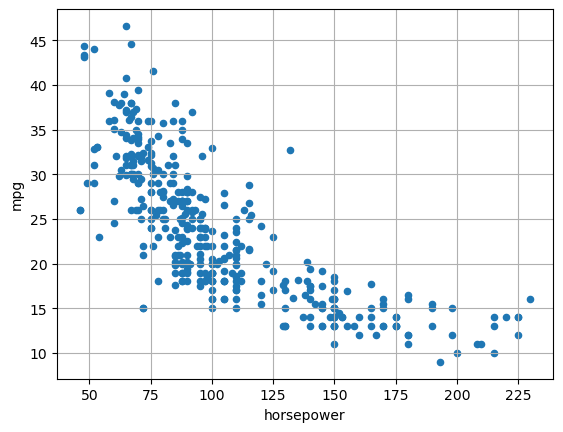

In [25]:
from matplotlib import pyplot as plt
data.plot.scatter(x='horsepower', y='mpg')
plt.grid()
plt.show()

## Regression Models
Regression models, in general, aim to **study the relationship between two variables**, $X$ and $Y$, by defining a mathematical model $f$ such that:

$$Y=f(X) + \epsilon$$

Here:
* $f$ is a deterministic function which can be used to **predict the values of $Y$ from the values of $X$**;
* $\epsilon$ is an **error term**, i.e., a variable capturing everything that is not captured by the deterministic function $f$. It can be due to different reasons, the main of which are:
  * $f$ is not an accurate deterministic function of the process. Since we don't know the "true" function $f$ and we are only estimating it, we may obtain a suboptimal $f$ for which $Y \neq f(X)$. The error term captures the differences between our predictions and the true values.
  * $Y$ cannot only be predicted from $X$, but some other variable is needed to correctly predict $Y$ from $X$. For instance, $X$ could be "years of education" and $Y$ can be "income". While may expect that "income" is not completely predicted from "years of education". This can happen also because we don't always have observations for all relevant variables.
  * the problem has inherent stochasticity which cannot be entirely modeled within the deterministic function $f$. For instance, consider the problem of predicting the rate of wins in poker based on the expertise of the player. The expertise surely allows to predict the rate of wins, but wins partially depend also on random factors, such as how the deck was shuffled.

Note that, often, we model $f$ in a way that we have its **analytical form**. This is very powerful. If we have the analytical form of the function $f$ which **explains** how $Y$ is influenced from $X$ (**can be predicted from $X$**), then we can really understand deeply the connection between the two variables!

The function $f$ can take different forms. The most common one is the **linear form** that we will see in the next section. While the linear form is very simple (and hence we can anticipate it will be a limited model in many cases), it has the great advantage to be **easy to interpret**.

## Simple Linear Regression
Simple linear regression aims to model the **linear relationship** between two variables $X$ and $Y$. In our example dataset, we will consider $X=\text{horsepower}$ and $Y=\text{mpg}$.

Since we are trying to model a linear relationship, we can imagine **a line passing through the data**. The simple linear regression model is defined as:

$$Y \approx \beta_0 + \beta_1X$$

In our example:

$$\text{mpg} \approx \beta_0 + \beta_1 \text{horsepower}$$

It is often common to introduce a **"noise" variable** which captures the randomness due to which the expression above is approximated and write:

$$Y = \beta_0 + \beta_1X + \epsilon$$

As we will see later, we expect $\epsilon$ to be **small and randomly distributed**.

Given the model above, we will call:

* $X$, the **independent variable** or **regressor**;
* $Y$, the **dependent variable** or **regressed variable**.

The values $\beta_0$ and $\beta_1$ are called **coefficients** or **parameters** of the model.

The mathematical model above has a geometrical interpretation. Indeed, specific values of $\beta_0$ and $\beta_1$ identify a given line in the 2D plane, as shown in the plot below:

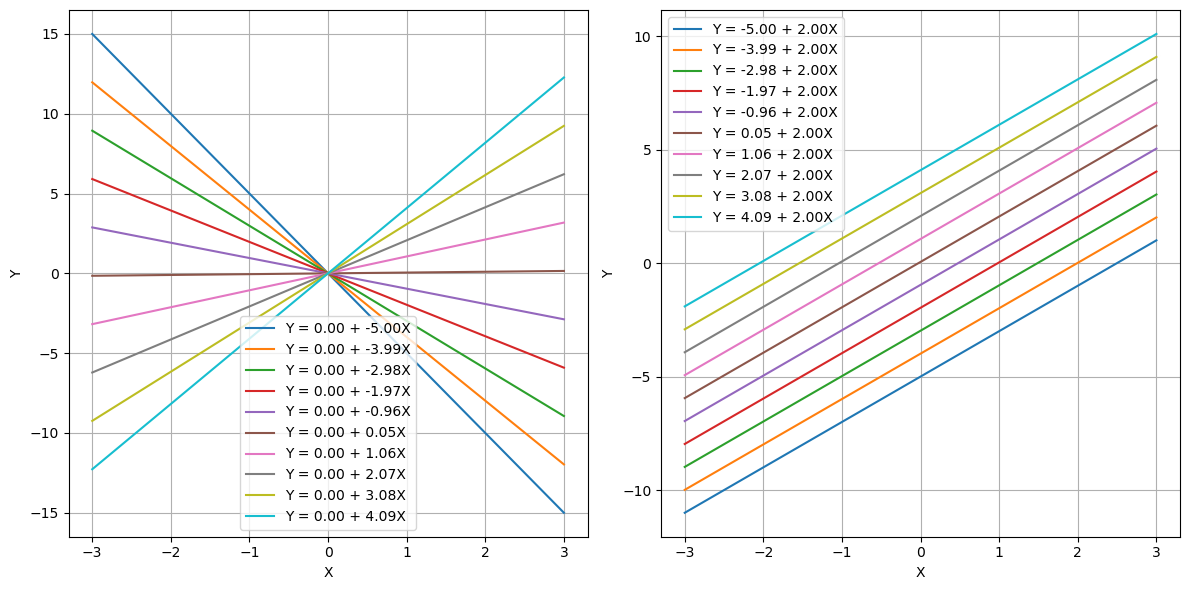

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data points
X = np.linspace(-3, 3, 100)
Y = np.linspace(-3, 3, 100)

# Create a range of values for beta_1 (keeping beta_0 fixed at 0)
beta_0_fixed = 0
beta_1_values = np.linspace(-5, 5, 100)

# Create a range of values for beta_0 (keeping beta_1 fixed at 2)
beta_1_fixed = 2
beta_0_values = np.linspace(-5, 5, 100)

# Calculate the corresponding Y values for each combination of beta_0 and beta_1
Y_pred_beta1 = beta_0_fixed + beta_1_values * X[:, np.newaxis]
Y_pred_beta0 = beta_0_values + beta_1_fixed * X[:, np.newaxis]

# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# First subplot: Varying beta_1 with fixed beta_0
plt.subplot(1, 2, 1)
for i in range(0, len(beta_1_values), 10):
    plt.plot(X, Y_pred_beta1[:, i], label=f'Y = {beta_0_fixed:.2f} + {beta_1_values[i]:.2f}X')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

# Second subplot: Varying beta_0 with fixed beta_1
plt.subplot(1, 2, 2)
for i in range(0, len(beta_0_values), 10):
    plt.plot(X, Y_pred_beta0[:, i], label=f'Y = {beta_0_values[i]:.2f} + {beta_1_fixed:.2f}X')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


We hence aim to estimate two appropriate values $\hat \beta_0$ and $\hat \beta_1$ from data in a way that they provide a model which represents well our data. In the case of our example, we expect the geometrical model to have this aspect:

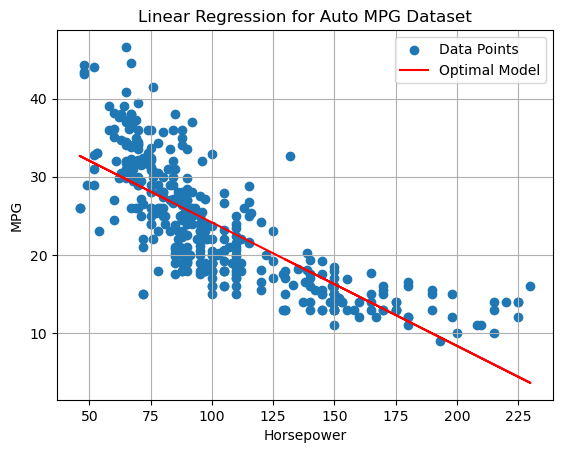

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extract the "horsepower" and "mpg" variables
X = data.dropna()["horsepower"].values.reshape(-1, 1)
y = data.dropna()["mpg"].values

# Perform linear regression
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Create a scatter plot of the data points
plt.scatter(X, y, label="Data Points")

# Plot the regression line in red
plt.plot(X, y_pred, color="red", label="Optimal Model")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Linear Regression for Auto MPG Dataset")
plt.legend()
plt.grid(True)
plt.show()


This line will also be called the **regression line**.

### Estimating the Coefficients - Ordinary Least Squares (OLS)

To estimate the coefficients of our optimal model, we should first define what is a good model. We will say that **a good model is one that predicts well the $Y$ variable from the $X$ one**. We already know from the example above that, since the relationship is not perfectly linear, the model will make some mistakes. 

Let $\{(x_i,y_i)\}$ be our set of observations. Let

$$\hat y_i = \hat \beta_0 + \hat \beta_1 x_i$$

be the prediction of the model for the observation $x_i$. For each data point $(x_i,y_i)$, we will define the deviation of the prediction from the $y_i$ value as follows:

$$e_i = y_i - \hat y_i$$

We use the symbol $e$ for error and also call these numbers **the residuals**, as they are the **differences (or residuals) between our prediction and the ground truth value**.

These numbers will be positive or negative based on whether we underestimate or overestimate the $y_i$ values, while **they will be zero when the prediction is perfect**.

As a global error indicator for the model, given the data, we will define the **residual sum of squares (RSS)** as:

$$RSS = e_1^2 + e_2^2 + \ldots + e_n^2 $$

or equivalently:

$$RSS = (y_1 - \hat \beta_0 - \hat \beta_1 x_1)^2 + (y_2 - \hat \beta_0 - \hat \beta_1 x_2)^2 + \ldots + (y_n - \hat \beta_0 - \hat \beta_1 x_n)^2$$

This number will be the sum of the square values of the dashed segments in the plot below:

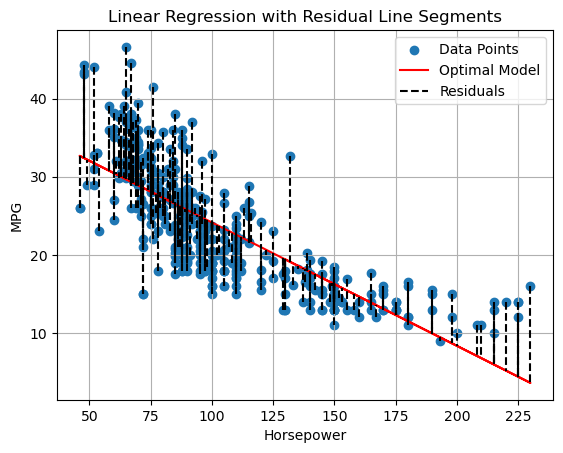

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extract the "horsepower" and "mpg" variables
X = data.dropna()["horsepower"].values.reshape(-1, 1)
y = data.dropna()["mpg"].values

# Perform linear regression
reg = LinearRegression().fit(X, y)
y_pred = reg.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Create a scatter plot of the data points
plt.scatter(X, y, label="Data Points")

# Plot the regression line in red
plt.plot(X, y_pred, color="red", label="Optimal Model")

bool = True
# Plot residual line segments
for xi, yi, residual in zip(X, y, residuals):
    if bool:
        plt.plot([xi, xi], [yi, yi - residual], color="black", linestyle="--", label='Residuals')
        bool = False
    else:
        plt.plot([xi, xi], [yi, yi - residual], color="black", linestyle="--")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Linear Regression with Residual Line Segments")
plt.legend()
plt.grid(True)
plt.show()


Intuitively, if we minimize these numbers, we will find the line which **best fits the data**. 

We can obtain estimates for $\hat \beta_0$ and $\hat \beta_1$ by minimizing the RSS using an approach called **ordinary least squares**. 

We can write the RSS as a function of the parameters to estimate:

$$RSS(\beta_0, \beta_1) = \sum_{i=1}^n(y_i - \beta_0 -  \beta_1 x_i)^2 $$

This is also called a **cost function** or **loss function**.

We aim to find:

$$(\hat \beta_0, \hat \beta_1) = \arg \min_{\beta_0, \beta_1} RSS(\beta_0, \beta_1)$$

The minimum can be found setting:

$$\frac{\partial RSS(\beta_0, \beta_1)}{\partial \beta_0} = 0$$
$$\frac{\partial RSS(\beta_0, \beta_1)}{\partial \beta_1} = 0$$

Doing the math, it can be shown that:

$$\hat \beta_1 = \frac{\sum_{i=1}^n(x_i - \overline x)(y_i - \overline y)}{\sum_{i=1}^n(x_i - \overline x)}$$
$$\hat \beta_0 = \overline y - \hat \beta_1 \overline x$$

#### Empirical Risk Minimization
It is worth noting that we can obtain the same result by following an Empirical Risk Minimization scheme. 

In particular, we can choose to use their squared values as our **cost function**:

$$L(h(x_i),y_i) = (h(x_i)-y_i)^2 = e_i^2$$

and define the Empirical Risk as follows:

$$R_{emp} = \frac{1}{N} \sum_{i=1}^N (h(x_i)-y_i)^2 = \frac{1}{N} RSS$$

where $h=f$.

Note that, since:

$$\hat h = \underset{h \in \mathcal{H}}{\mathrm{arg\ min}}\ R_{emp}(h) = \underset{h \in \mathcal{H}}{\mathrm{arg\ min}}\ \frac{1}{N} \sum_{i=1}^N (h(x)-y)^2 = \underset{h \in \mathcal{H}}{\mathrm{arg\ min}}\ \frac{1}{N} RSS =  \underset{h \in \mathcal{H}}{\mathrm{arg\ min}}\ RSS$$

we can solve the optimization problem with **Ordinary Least Squares (OLS)** (the same method we used previously to minimize RSS).

From a **learning perspective**, solving the optimization problem $\hat h = \underset{h \in \mathcal{H}}{\mathrm{arg\ min}}\ R_{emp}(h)$ corresponds to **finding the optimal set of parameters $\mathbf{\beta}$ minimizing the empirical risk**, which corresponds to minimizing the Residual Sum of Squares, as previously defined.

### Interpretation of the Coefficients of Linear Regression

Using the formulas above, we find the following values for the example above:

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extract the "horsepower" and "mpg" variables
X = data.dropna()["horsepower"].values.reshape(-1, 1)
y = data.dropna()["mpg"].values

# Perform linear regression
reg = LinearRegression().fit(X, y)

print(f"beta_0: {reg.intercept_:0.2f}")
print(f"beta_1: {reg.coef_[0]:0.2f}")

beta_0: 39.94
beta_1: -0.16


These parameters identify the following line:

$$y = 39.94 - 0.15 x$$

The plot below shows the line on the data:

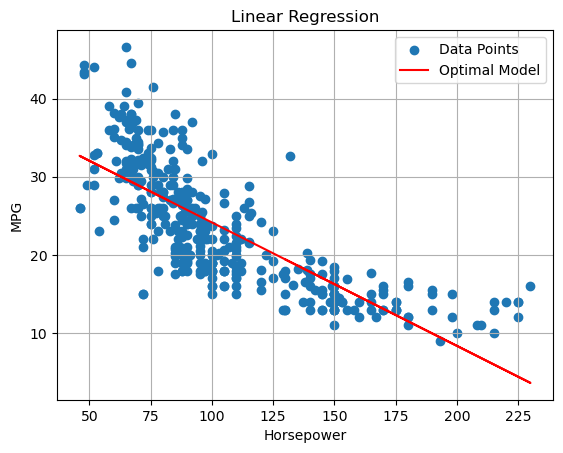

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extract the "horsepower" and "mpg" variables
X = data.dropna()["horsepower"].values.reshape(-1, 1)
y = data.dropna()["mpg"].values

# Perform linear regression
reg = LinearRegression().fit(X, y)

y_pred = reg.predict(X)

# Calculate the residuals
residuals = y - y_pred

# Create a scatter plot of the data points
plt.scatter(X, y, label="Data Points")

# Plot the regression line in red
plt.plot(X, y_pred, color="red", label="Optimal Model")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Linear Regression")
plt.legend()
plt.grid(True)
plt.show()


Apart from the geometric interpretation, the coefficients of a linear regressor have an important **statistical interpretation**. In particular:

**The intercept $\beta_0$ is the value of $y$ that we get when the input value $x$ is equal to zero $x=0$ (i.e., $f(0)$)**. This value **may not always make sense**. For instance, in the example above, we have: $\beta_0 = 39.94$, which means that, **when the horsepower is $0$, then the consumption in mpg is equal to $39.94$**. 

**The coefficient $\beta_1$ indicates the steepness of the curve**. If $\beta_1$ is large, then the curve is steep. This indicates that a small change in $x$ is associated to a large change in $y$. In general, we can see that: 

$$f(x+1)-f(x)=\beta_0+\beta_1 (x+1)-\beta_0-\beta_1 x=\beta_1 (x+1-x)=\beta_1$$

which reveals that **when we observe an increment of one unit of x, we observe an increment of $\beta_1$ units in y**. In our example, $\beta_1=-0.15$, hence we can say that, for cars with one additional unit of horsepower, we observe an drop in mpg $-0.15$ units.

### Accuracy of the Coefficient Estimates
Recall that we are trying to model the relationship between two random variables $X$ as $Y$ with a simple linear model:

$$Y = \beta_0 + \beta_1X+\epsilon$$

This means that, once we find appropriate values of $\beta_0$ and $\beta_1$, we expect these to summarize the **linear relationship in the population** or the **population regression line**. Also, recall that these values are obtained using two formulas which are based on realizations of $X$ of $Y$ and can be hence seen as **estimators**:

$$\hat \beta_1 = \frac{\sum_{i=1}^n(x_i - \overline x)(y_i - \overline y)}{\sum_{i=1}^n(x_i - \overline x)^2}$$
$$\hat \beta_0 = \overline y - \hat \beta_1 \overline x$$

We now recall that, being estimates, they provide values related to a given **realization of the random variables**.

Let us consider an ideal population for which:

$$Y=2x+1$$

Ideally, given a sample from the population, we expect to obtain $\hat \beta_0 \approx 1$ and $\hat \beta_1 \approx 2$. In practice, different samples may lead to different estimates and hence different regression lines, as shown in the plot below:

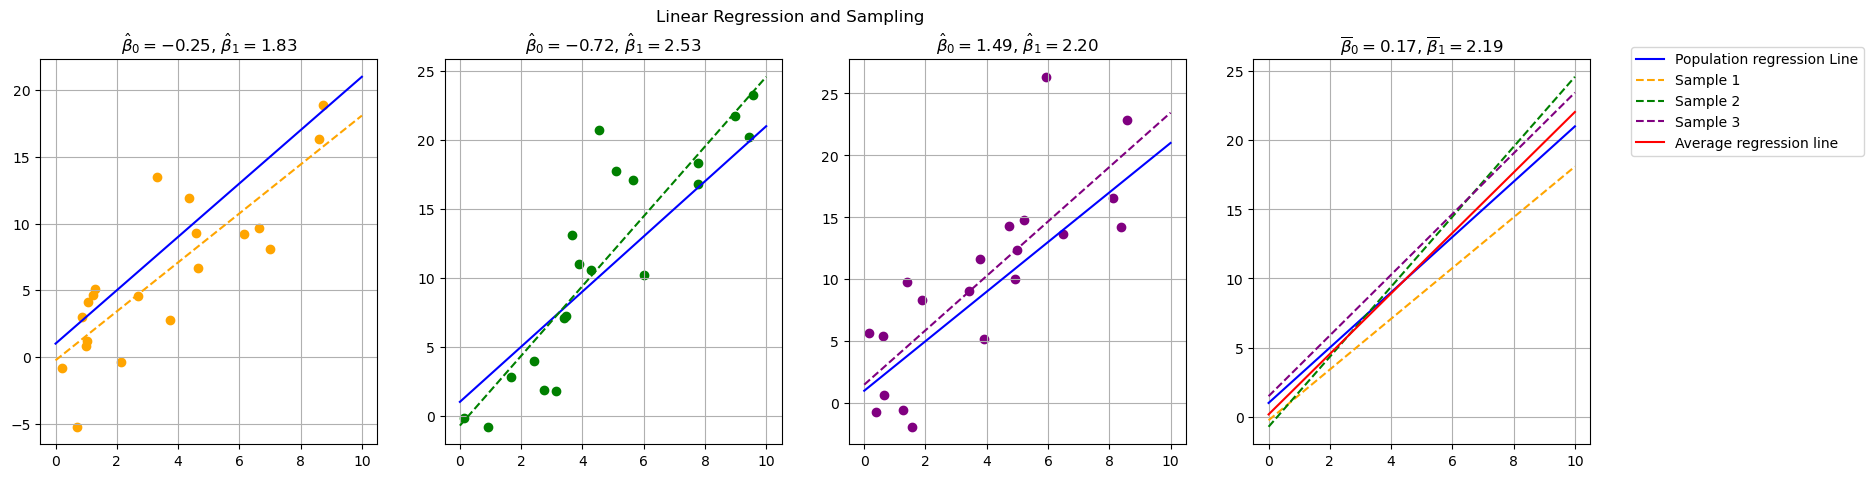

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# True population parameters for the linear relationship
true_slope = 2.0
true_intercept = 1.0
sigma2 = 4

# Generate data points from the population
np.random.seed(42)
population_x = np.linspace(0, 10, 1000)
population_y = true_slope * population_x + true_intercept

# Create a figure with the population regression line
plt.figure(figsize=(20, 5))


# Simulate different random samples from the population
num_samples = 3
sample_size = 20

plt.suptitle("Linear Regression and Sampling")

colors = ['orange','green','purple','red','brown','pink','gray']

slopes = []
intercepts = []

for i in range(num_samples):
    plt.subplot(1,num_samples+1,i+1)
    plt.plot(population_x, population_y, label="Population Regression Line", color="blue")
    sample_x = np.random.choice(population_x, sample_size)
    sample_y = true_intercept + true_slope*sample_x + np.random.normal(0,sigma2,sample_size)
    
    # Fit a linear regression model to the sample
    slope, intercept = np.polyfit(sample_x, sample_y, 1)
    sample_regression_y = slope * population_x + intercept

    slopes.append(slope)
    intercepts.append(intercept)

    plt.title(f"$\\hat \\beta_0={intercept:.2f}$, $\\hat \\beta_1={slope:.2f}$")

    # Plot the regression line for the current sample
    plt.plot(population_x, sample_regression_y, linestyle='--', label=f"Sample {i + 1}", color=colors[i])
    plt.scatter(sample_x, sample_y, color=colors[i])
    plt.grid()


plt.subplot(1,num_samples+1,num_samples+1)
plt.plot(population_x, population_y, label="Population regression Line", color="blue")
for i in range(num_samples):
    sample_regression_y = slopes[i] * population_x + intercepts[i]

    # Plot the regression line for the current sample
    plt.plot(population_x, sample_regression_y, linestyle='--', label=f"Sample {i + 1}", color=colors[i])

avg_slope = np.mean(slopes)
avg_intercept = np.mean(intercepts)

sample_regression_y = avg_slope * population_x + avg_intercept
plt.plot(population_x, sample_regression_y, linestyle='-', label=f"Average regression line", color=colors[i+1])
plt.title(f"$\\overline\u007b\\beta\u007d_0={avg_intercept:.2f}$, $\\overline\u007b\\beta\u007d_1={avg_slope:.2f}$")
plt.grid()
plt.legend(bbox_to_anchor=(1.1, 1.05))


plt.show()


Each of the first three subplots shows a different sample drawn from the population, with its corresponding estimated regression line, along with the true population regression line. The last subplot compares the different estimated lines with the population regression line and the average regression line (in red). Coefficient estimates are shown in the subplot titles.

As can be noted, each estimate can be inaccurate, while the average regression line is very close to the population regression line. This is due to the fact that our estimators for the parameters of the regression coefficients **have non-zero variance**. In practice, it can be shown that these estimators are **unbiased** (hence the average regression line is close to the population line).

#### Confidence Intervals of the Regression Coefficients
Since the formulas to compute regression parameters can be seen as estimators, we can compute **standard errors** and **confidence intervals**.

For instance, for our model

$$horsepower \approx \beta_0 + mpg \cdot \beta_1$$

We will have the following confidence interval at a $95\%$ confidence level (which is a common CL):

||COEFFICIENT|STD ERROR|CONFIDENCE INTERVAL|
|-|-|-|-|
|$\beta_0$|39.94|0.717|$[38.53, 41.35]$|
|$\beta_1$|-0.1578|0.006|$[-0.17, -0.15]$|



From the table above, we can say that:
* The value of `mpg` for `horsepower=0` lies somewhere between $38.53$ and $41.35$;
* An increase of `horsepower` by one unit is associated to a decrease of `mpg` between $-0.17$ and $-0.15$.

It is also common to see plots like the following one:

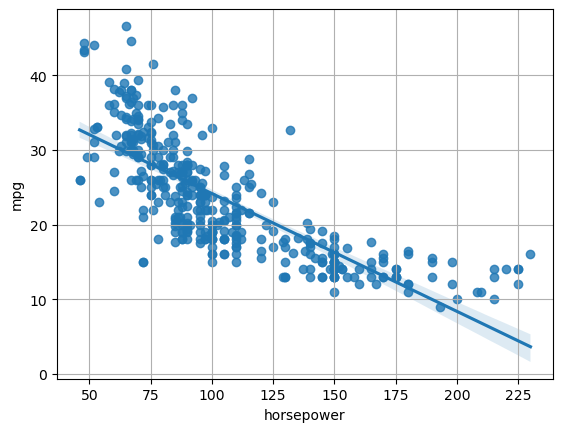

In [32]:
import seaborn as sns
sns.regplot(data=data, x='horsepower', y='mpg')
plt.grid()
plt.show()

In the plot above, the shading around the line illustrates the variability induced by the confidence intervals estimated for the coefficients.

#### Statistical Tests for the Significance of Coefficients
Seeing the aforementioned formulas as estimators also allows to perform **hypothesis tests** on the coefficients. In practice, it is common to perform a statistical test to assess whether the coefficient $\beta_1$ is significantly different from zero. It is interesting to check this because, if $\beta_1$ was equal to zero, then there would not be any correlation between the variables (and hence the linear regressor would not be useful). Indeed, if $\beta_1=0$:

$$Y=\beta_0 + \epsilon$$

Hence $Y$ cannot be predicted from $X$ and the two variables are not associated. 

The **null hypothesis** of the test is as follows:

$$H_0: \text{There is no association between } X \text{ and } Y \Leftrightarrow \beta_1=0$$

While the **alternative hypothesis** is formulated as follows:

$$H_1: \text{There is some association between } X \text{ and } Y \Leftrightarrow \beta_1 \neq 0$$

We won't see the mathematical details of this test, but it works as usual: we compute some statistic $t$ following a known distribution (a t-Student distribution in this case), then compute a **p-value** and reject the null hypothesis if this is under the significance level $p < \alpha$ (often set to $\alpha=0.05$).

A similar test is conducted to check whether $\beta_0$ is significantly different from zero. But in this case it is not a big deal if the test fails as $\beta_0=0$ is a perfectly reasonable result (the regression line passes through the origin).

Let's see the updated table from the same example:

||COEFFICIENT|STD ERROR|t|P>\|t\||CONFIDENCE INTERVAL|
|-|-|-|-|-|-|
|$\beta_0$|$39.94$|$0.717$|$55.66$|$0$|$[38.53, 41.35]$|
|$\beta_1$|$-0.1578$|$0.006$|$-24.49$|$0$|$[-0.17, -0.15]$|

From the table above, we can conclude that both $\beta_0$ and $\beta_1$ are significantly different than $0$ (the p-value is equal to zero). This can also be noted by the fact that the confidence intervals do not contain the zero number. 

## Assessing Model Accuracy

The hypothesis tests (like the t-test for $\beta_1$) tell us *if* a statistically significant relationship exists. They do not, however, tell us **how well the model fits the data** or **how accurate its predictions are**.

To measure performance, we use different metrics that generally fall into two categories, aligning with our "two goals":
1.  **Metrics for Understanding (Goodness-of-Fit):** These are used in the "Statistical" approach to measure how well the model explains the data it was trained on. (e.g., RSE, R²)
2.  **Metrics for Prediction (Predictive Accuracy):** These are used in the "Machine Learning" approach to measure how well the model performs on new, unseen data. (e.g., MSE, RMSE, MAE)

### The Building Block: Residuals and RSS

All regression metrics are built upon the **residuals**—the errors from the model. A residual ($e_i$) is the difference between the observed value ($y_i$) and the predicted value ($\hat{y}_i$):

$$e_i = y_i - \hat{y}_i$$

The **Residual Sum of Squares (RSS)** which we already saw is the foundational quantity that OLS (Ordinary Least Squares) minimizes. It is the sum of all squared residuals:

$$RSS = \sum_{i=1}^n e_i^2 = \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

### Metrics for Understanding (Goodness-of-Fit)

When our goal is **understanding** (inference), we typically evaluate the model on the entire dataset it was trained on.

#### 1. Residual Standard Error (RSE)
The RSE is the *statistical* estimate of the standard deviation of the irreducible error, $\epsilon$. It measures the "typical" error of the model.

$$RSE = \sqrt{\frac{RSS}{n-2}} = \sqrt{\frac{1}{n-2}\sum_{i=1}^n (y_i-\hat y_i)^2}$$

* **Why $n-2$?** We divide by the "degrees of freedom" ($n-2$) because we estimated *two* parameters ($\beta_0$ and $\beta_1$). This makes RSE an unbiased estimate of $\sigma$ (the standard deviation of $\epsilon$).
* **Interpretation:** RSE is an **absolute measure** of the model's "lack of fit," expressed in the **same units as $Y$**. A smaller RSE means the model fits the data better.

To know if an RSE value is "good," you must compare it to the scale of $Y$.
* **Example:** For our `mpg` data, $RSE = 4.91$. The mean value of `mpg` is $\overline{y} = 23.52$. This means our model's typical error ($4.91$) is about **20%** of the average value, which may be acceptable or not, depending on the context.

#### 2. The $R^2$ Statistic
The RSE is an absolute measure. It's often more useful to have a *relative* measure that tells us what proportion of the data's variance our model can explain. This is the **$R^2$ (Coefficient of Determination)**.

To calculate $R^2$, we first define a "baseline" model that just predicts the average $Y$ for every $X$:
$$\hat{y}_{baseline} = \overline{y}$$

The error of this "dumb" model is the **Total Sum of Squares (TSS)**:
$$TSS = \sum_{i=1}^n(y_i-\overline y)^2$$

* **TSS** measures the **total variance** in $Y$ (before any regression).
* **RSS** measures the **unexplained variance** in $Y$ (what's left over *after* regression).

The $R^2$ statistic is the proportion of total variance that is "explained" by the model:

$$R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS}$$

* **Interpretation:** $R^2$ is a value between 0 and 1 (or 0% to 100%).
    * $R^2 = 0$: Our model is no better than just guessing the mean ($RSS = TSS$).
    * $R^2 = 1$: Our model perfectly explains all the variance ($RSS = 0$).
    * **Example:** For our `mpg` data, $R^2 = 0.61$. This means **"61% of the variance in `mpg` can be explained by `horsepower`."**

For simple linear regression (one $X$), $R^2$ is also equal to the square of the Pearson correlation coefficient: $R^2 = \rho^2$.

### Visual Examples
The plot below shows examples of linear regression fits with the different evaluation measures that we saw:

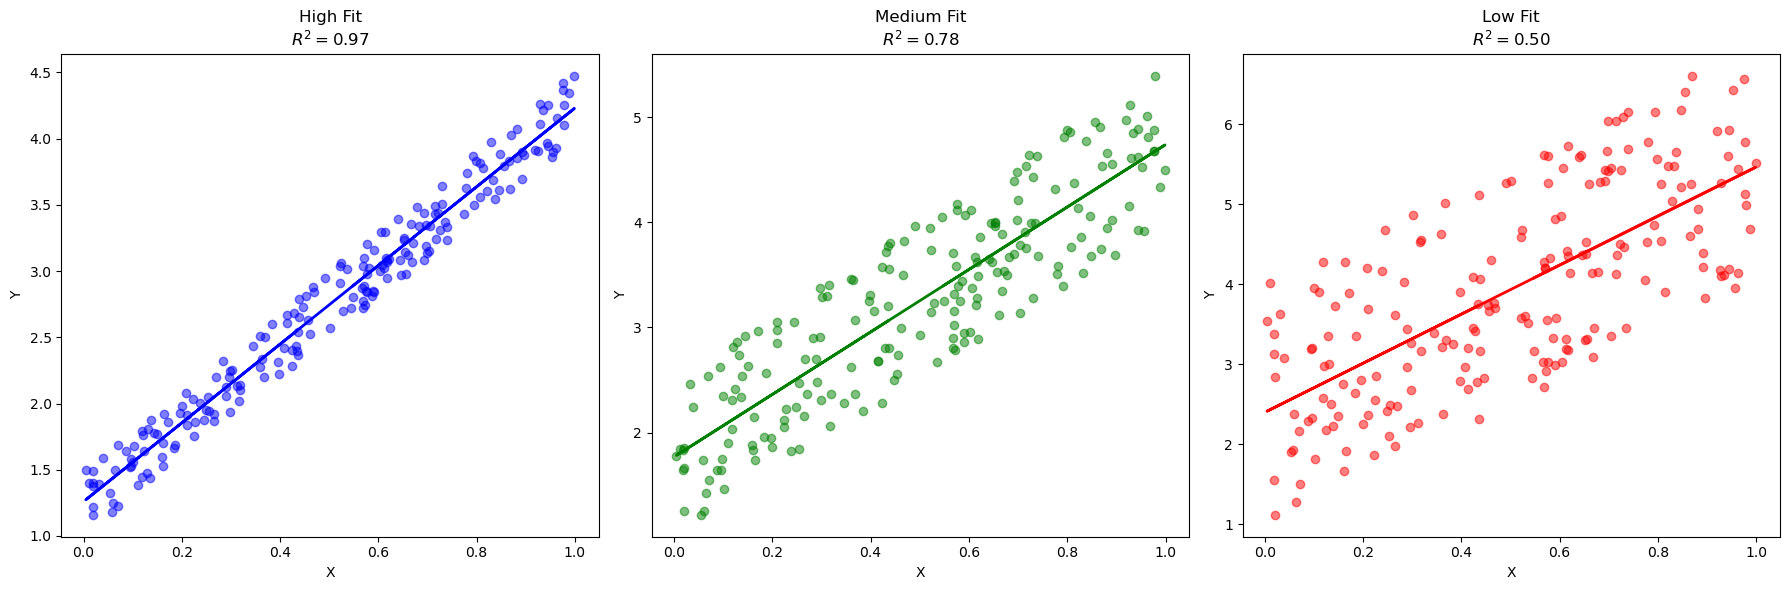

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Generate random data
np.random.seed(0)
x = np.random.rand(200, 1)

# Define noise levels
noise1 = 0.5 * np.random.rand(200, 1)
noise2 = 1.5 * np.random.rand(200, 1)
noise3 = 3.0 * np.random.rand(200, 1)

# Create y values
y1 = 3 * x + 1 + noise1  # High R-squared (low noise)
y2 = 3 * x + 1 + noise2  # Medium R-squared
y3 = 3 * x + 1 + noise3  # Low R-squared (high noise)

# 2. Fit linear regression models
reg1 = LinearRegression().fit(x, y1)
reg2 = LinearRegression().fit(x, y2)
reg3 = LinearRegression().fit(x, y3)

# 3. Get predictions
y_pred1 = reg1.predict(x)
y_pred2 = reg2.predict(x)
y_pred3 = reg3.predict(x)

# 4. Calculate all metrics
# Set 1 (High Fit)
r2_1 = r2_score(y1, y_pred1)
mse_1 = mean_squared_error(y1, y_pred1)
rmse_1 = np.sqrt(mse_1)
mae_1 = mean_absolute_error(y1, y_pred1)

# Set 2 (Medium Fit)
r2_2 = r2_score(y2, y_pred2)
mse_2 = mean_squared_error(y2, y_pred2)
rmse_2 = np.sqrt(mse_2)
mae_2 = mean_absolute_error(y2, y_pred2)

# Set 3 (Low Fit)
r2_3 = r2_score(y3, y_pred3)
mse_3 = mean_squared_error(y3, y_pred3)
rmse_3 = np.sqrt(mse_3)
mae_3 = mean_absolute_error(y3, y_pred3)

# 5. Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) # Made figure wider

# Helper function to create a formatted title string
def create_title(r2, mse, rmse, mae):
    # Use matplotlib's TeX rendering for R^2
    r2_str = r'$R^2 = ' + f'{r2:.2f}$'
    # Format other metrics
    mse_str = f'MSE = {mse:.2f}'
    rmse_str = f'RMSE = {rmse:.2f}'
    mae_str = f'MAE = {mae:.2f}'
    return f"{r2_str}"

# Plot the first dataset
axes[0].scatter(x, y1, c='blue', alpha=0.5)
axes[0].plot(x, y_pred1, color='blue', linewidth=2)
axes[0].set_title(f"High Fit\n{create_title(r2_1, mse_1, rmse_1, mae_1)}", fontsize=12)
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')

# Plot the second dataset
axes[1].scatter(x, y2, c='green', alpha=0.5)
axes[1].plot(x, y_pred2, color='green', linewidth=2)
axes[1].set_title(f"Medium Fit\n{create_title(r2_2, mse_2, rmse_2, mae_2)}", fontsize=12)
axes[1].set_xlabel('X')
axes[1].set_ylabel('Y')

# Plot the third dataset
axes[2].scatter(x, y3, c='red', alpha=0.5)
axes[2].plot(x, y_pred3, color='red', linewidth=2)
axes[2].set_title(f"Low Fit\n{create_title(r2_3, mse_3, rmse_3, mae_3)}", fontsize=12)
axes[2].set_xlabel('X')
axes[2].set_ylabel('Y')

plt.tight_layout()
plt.show()

### Diagnostic Plots: Checking Model Validity

The metrics above ($R^2$, $RMSE$) are "scoring" metrics. They give you a single number to summarize *how much* error you have.

However, they don't tell you *why* you have error, or if your model is fundamentally **invalid**. A model can have a "good" $R^2$ but still be flawed. We use **residual plots** as *diagnostic* tools to check this.

#### 1. The Residuals vs. Fitted Plot

This is the most important diagnostic plot. We plot the **Residuals ($e_i$)** on the y-axis against the **Fitted (Predicted) Values ($\hat{y}_i$)** on the x-axis.

**What we *want* to see:** A boring, random cloud of points with no pattern, centered around the $y=0$ line. This indicates our model has captured the pattern and the remaining errors are just random noise.

**What we *don't* want to see (Red Flags):**

* **A "U-Shape" or any Clear Pattern:** This means our model is **wrong**. The relationship between $X$ and $Y$ was **not linear**, and our simple linear model has failed to capture the true non-linear pattern.
    * **Diagnosis:** Violates the **Linearity** assumption.
    * **Fix:** You need a more complex model (e.g., polynomial regression).
    

* **A "Fanning" or "Cone" Shape:** The residuals get bigger (more spread out) as the predicted value $\hat{y}$ gets bigger.
    * **Diagnosis:** This is called **Heteroscedasticity** (non-constant variance).
    * **Problem:** This violates a core assumption of linear regression. It means our p-values and confidence intervals are unreliable because the model is less accurate for high-value predictions.

The figure below shows some examples of what to expect:

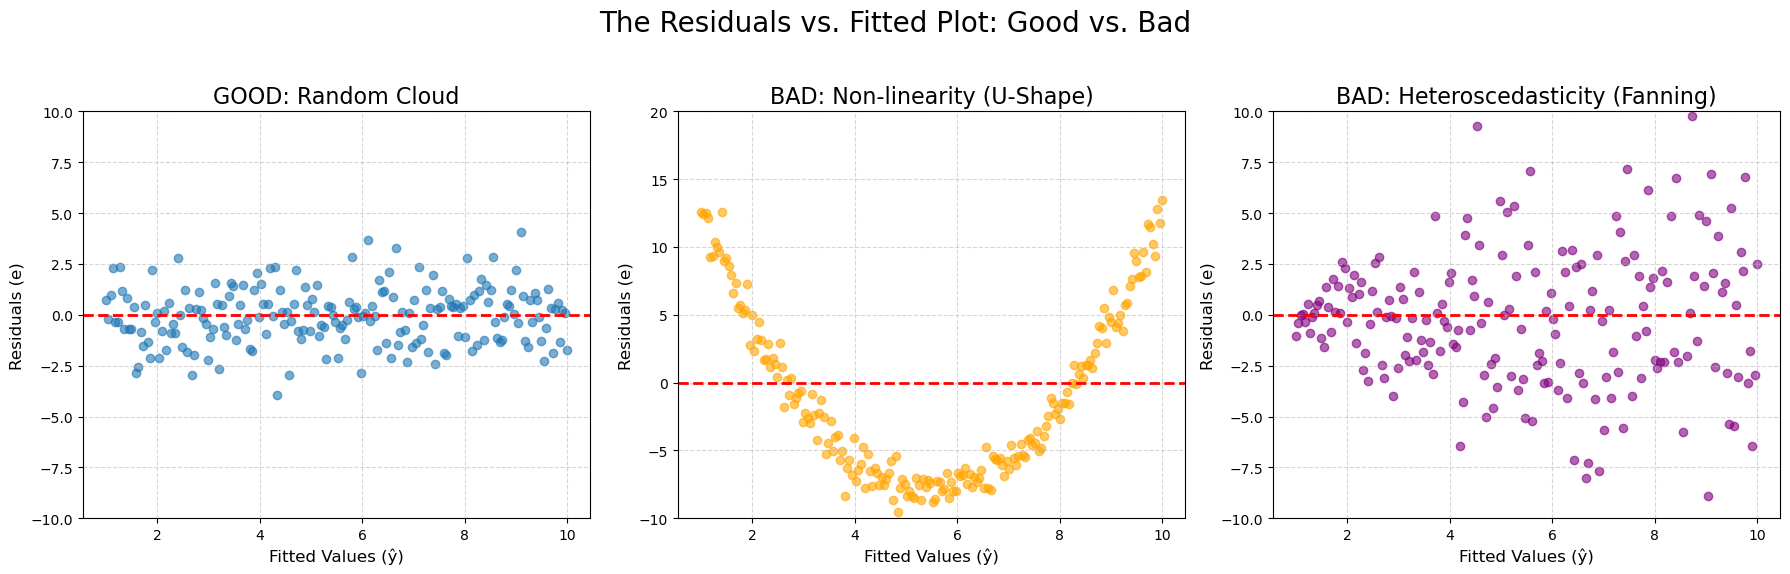

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Set a consistent random seed for reproducible plots
np.random.seed(42)

# --- 1. Generate Data for all Three Plots ---

n = 200  # Number of data points for each plot
fitted_values = np.linspace(1, 10, n)

# Plot 1: "Good" data - random noise, constant variance
residuals_good = np.random.randn(n) * 1.5

# Plot 2: "Bad" data (Non-linearity) - a U-shape
# We create residuals that follow a parabola + some noise
residuals_nonlinear = ((fitted_values - 5.5)**2 - 8) + np.random.randn(n) * 1.0

# Plot 3: "Bad" data (Heteroscedasticity) - fanning shape
# We create noise where the standard deviation *increases* with the fitted value
residuals_hetero = (fitted_values / 1.5) * np.random.randn(n)

# --- 2. Create the Figure with 3 Subplots ---

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('The Residuals vs. Fitted Plot: Good vs. Bad', fontsize=20)

# --- Plot 1: Good (Ideal) ---
ax1.scatter(fitted_values, residuals_good, alpha=0.6)
ax1.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax1.set_title('GOOD: Random Cloud', fontsize=16)
ax1.set_xlabel('Fitted Values (ŷ)', fontsize=12)
ax1.set_ylabel('Residuals (e)', fontsize=12)
ax1.set_ylim(-10, 10) # Set consistent y-limits
ax1.grid(True, linestyle='--', alpha=0.5)

# --- Plot 2: Bad (Non-linearity) ---
ax2.scatter(fitted_values, residuals_nonlinear, alpha=0.6, color='orange')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.set_title('BAD: Non-linearity (U-Shape)', fontsize=16)
ax2.set_xlabel('Fitted Values (ŷ)', fontsize=12)
ax2.set_ylabel('Residuals (e)', fontsize=12)
ax2.set_ylim(-10, 20) # Adjust y-limit for this pattern
ax2.grid(True, linestyle='--', alpha=0.5)

# --- Plot 3: Bad (Heteroscedasticity) ---
ax3.scatter(fitted_values, residuals_hetero, alpha=0.6, color='purple')
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax3.set_title('BAD: Heteroscedasticity (Fanning)', fontsize=16)
ax3.set_xlabel('Fitted Values (ŷ)', fontsize=12)
ax3.set_ylabel('Residuals (e)', fontsize=12)
ax3.set_ylim(-10, 10) # Set consistent y-limits
ax3.grid(True, linestyle='--', alpha=0.5)

# --- 3. Finalize and Save ---
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for main title

#### 2. The Q-Q Plot (Quantile-Quantile Plot)

This is a plot used to check if the residuals are **normally distributed**. This is another key assumption for all our statistical tests (p-values, t-statistics).

* **Purpose:** To check the **Normality** assumption.
* **How to read it:** If the residuals are truly normally distributed, the points will fall perfectly along the diagonal line.
* **Problem:** If the points "S-curve" or peel away from the line, it means the residuals are not normal, and our p-values and confidence intervals may be inaccurate.

The figure below shows examples of "good" and "bad" residuals:

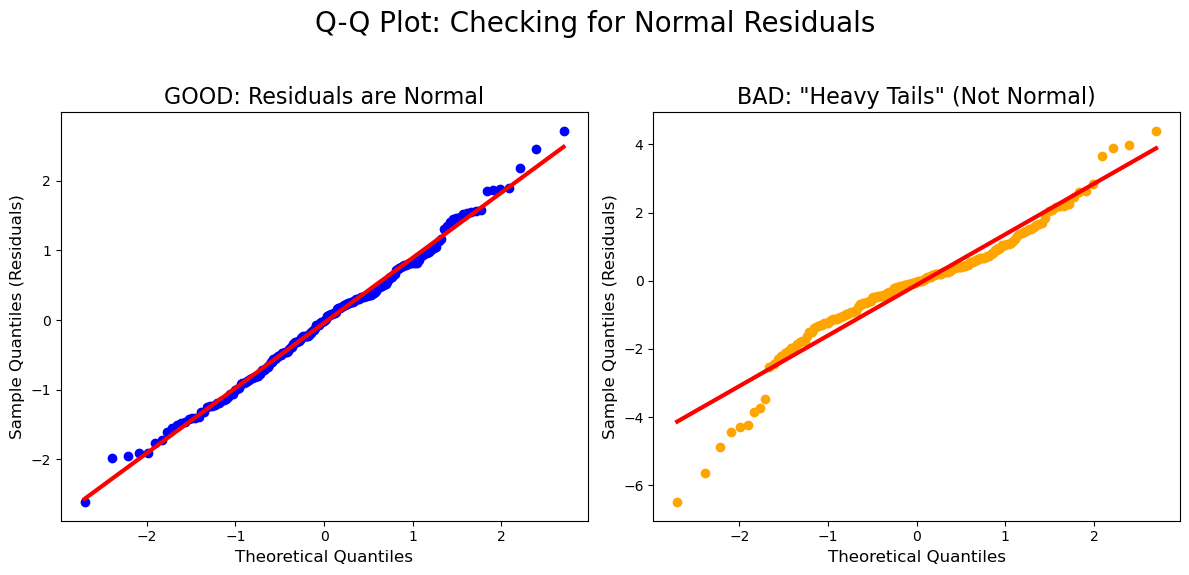

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Set a consistent random seed for reproducible plots
np.random.seed(42)

# --- 1. Generate Data for both Plots ---

n = 200  # Number of data points for each plot

# Plot 1: "Good" data - residuals are normally distributed
residuals_good = np.random.randn(n)

# Plot 2: "Bad" data - residuals have "heavy tails"
# We use a t-distribution with 3 degrees of freedom, which has more outliers
residuals_bad_heavy_tails = stats.t.rvs(df=3, size=n)


# --- 2. Create the Figure with 2 Subplots ---

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Q-Q Plot: Checking for Normal Residuals', fontsize=20)


# --- Plot 1: Good (Normally Distributed) ---

# stats.probplot generates the Q-Q plot and automatically fits the line
stats.probplot(residuals_good, dist="norm", plot=ax1)

ax1.set_title('GOOD: Residuals are Normal', fontsize=16)
ax1.set_xlabel('Theoretical Quantiles', fontsize=12)
ax1.set_ylabel('Sample Quantiles (Residuals)', fontsize=12)

# Get the line from the plot to change its color and style
ax1.get_lines()[0].set_markerfacecolor('blue')
ax1.get_lines()[0].set_markeredgecolor('blue')
ax1.get_lines()[1].set_color('red')
ax1.get_lines()[1].set_linewidth(3)


# --- Plot 2: Bad (Heavy Tails / Not Normal) ---

# Generate the Q-Q plot for the bad data
stats.probplot(residuals_bad_heavy_tails, dist="norm", plot=ax2)

ax2.set_title('BAD: "Heavy Tails" (Not Normal)', fontsize=16)
ax2.set_xlabel('Theoretical Quantiles', fontsize=12)
ax2.set_ylabel('Sample Quantiles (Residuals)', fontsize=12)

# Get the line from the plot to change its color and style
ax2.get_lines()[0].set_markerfacecolor('orange')
ax2.get_lines()[0].set_markeredgecolor('orange')
ax2.get_lines()[1].set_color('red')
ax2.get_lines()[1].set_linewidth(3)


# --- 3. Finalize and Save ---
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust for main title

## Multiple Linear Regression

In the **MPG example**, we saw that about $61\%$ of the variance in $Y$ was explained by the model. One may wonder why about $39\%$ of the variance could not be explained. Some common reasons may be:
* There is stochasticity in the data which prevents us to learn an accurate function to predict $Y$ from $X$;
* The relationship between $X$ and $Y$ is far from linear, so we cannot predict $Y$ accurately;
* The prediction of $Y$ also depends on other variables.

While in general the unexplained variance is due to a combination of the aforementioned factors, the third one is often very common and relatively easy to fix. In our case, we are trying to predict `mpg` from `horsepower`. However, we can easily imagine how other variables may contribute to the estimation of `mpg`. For instance, two cars with the same `horsepower` but different `weight` may have different values of `mpg`. We can hence try to find a model with **also uses `weight` to predict `mpg`**. This is simply done by adding an additional coefficient for the new variable:

$$mpg = \beta_0 + \beta_1 horsepower + \beta_2 weight$$

The obtained model is called **multiple linear regression**. If we fit this model (we will see how to estimate coefficients in this case), we obtain the following $R^2$ value:

$$R^2=0.71$$

An increment of $+0.1$!

In general, we can include as many variables as we think is relevant to add and define the following model:

$$Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_n X_n$$

For instance, the following model:

$$mpg = \beta_0 + \beta_1 horsepower + \beta_2 weight + \beta_3 model\_year$$

Has an $R^2$ value of:

$$R^2=0.808$$

### Geometrical Interpretation

The multiple regression model based on two variable has a geometrical interpretation. Indeed, the equation:

$$Z = \beta_0 + \beta_1 X + \beta_2 Y$$

identifies a plane in the 3D space. We can visualize the plane identified by the $mpg = \beta_0 + \beta_1 horsepower + \beta_2 weight$ model as follows:

/var/folders/cs/p62_d78d49n3ddj0xlfh1h7r0000gn/T/ipykernel_70719/9283374.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  auto_df = pd.read_csv(url, delim_whitespace=True, names=column_names)


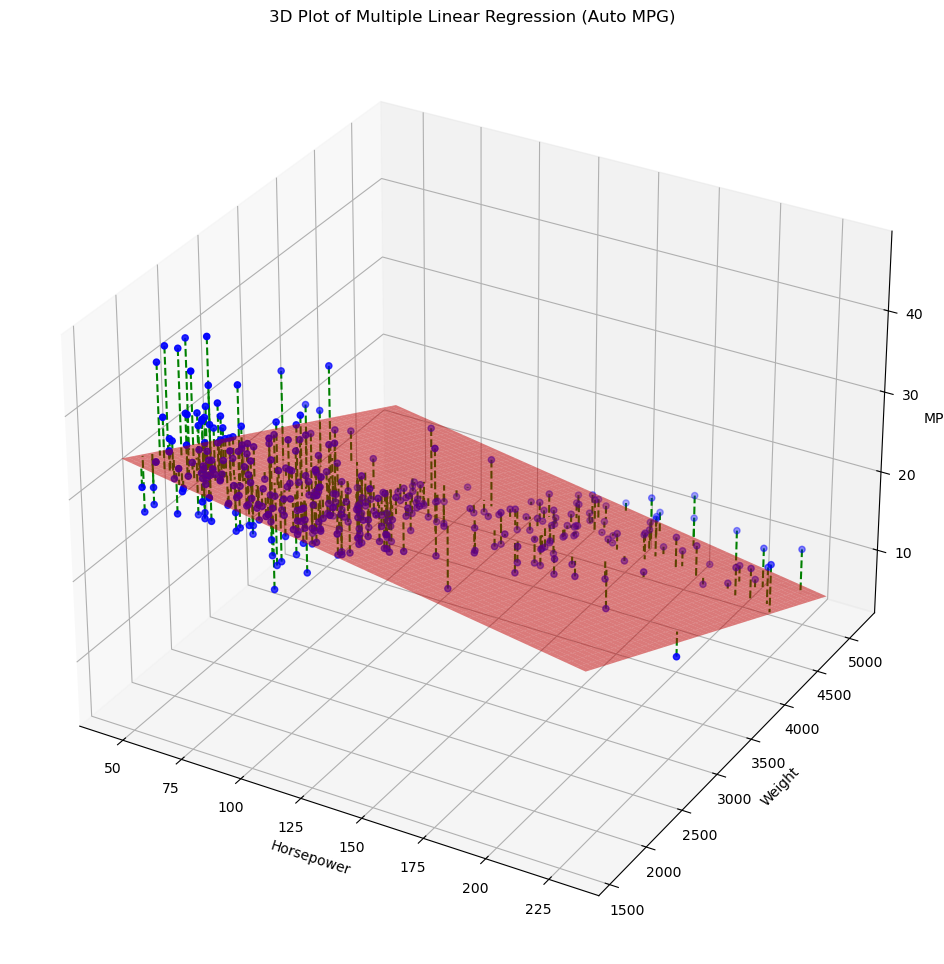

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Load the Auto MPG dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
auto_df = pd.read_csv(url, delim_whitespace=True, names=column_names)

# Clean the dataset by removing missing values
auto_df = auto_df[auto_df.horsepower != '?']
auto_df['horsepower'] = auto_df['horsepower'].astype(float)

# Select relevant columns for the analysis
X = auto_df[["horsepower", "weight"]].values
y = auto_df["mpg"].values

# Standardize the features
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
X_scaled = X

# Fit a linear regression model
reg = LinearRegression()
reg.fit(X_scaled, y)

# Create a grid for the plot
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50), np.linspace(y_min, y_max, 50))

# Predict the response variable (mpg)
zz = reg.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

# Create a 3D scatter plot of data points
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_scaled[:, 0], X_scaled[:, 1], y, c='b', marker='o', label='Data Points')

# Plot the regression plane
ax.plot_surface(xx, yy, zz, color='r', alpha=0.5, label='Regression Plane')

# Calculate and add residuals for every data point
predicted_mpg = reg.predict(X_scaled)
for i in range(len(X_scaled)):
    x = [X_scaled[i, 0], X_scaled[i, 0]]
    yy = [X_scaled[i, 1], X_scaled[i, 1]]
    z = [y[i], predicted_mpg[i]]
    ax.plot(x,yy,z, linestyle='--', color='g')

ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('MPG')
ax.set_title('3D Plot of Multiple Linear Regression (Auto MPG)')
#plt.legend()
plt.show()


The dashed lines indicate the residuals. The best fit of the model minimizes again the sum of squared residuals. This model makes predictions selecting the $Z$ value which intersect the plane for given values of $X$ and $Y$.

In general, when we consider $n$ variables, the linear regressor will be **a (n-1)-dimensional hyperplane in the n-dimensional space**.

### Statistical Interpretation
The statistical interpretation of a multiple linear regression model is very similar to the interpretation of a simple linear regression model. Given the general model:

$$y=\beta_0 + \beta_1 x_1 + \ldots + \beta_i x_i + \ldots + \beta_n x_n$$

we can interpret the coefficients as follows:

* The value of $\beta_0$ indicates the value of $y$ when all independent variables are set to zero;
* The value of $\beta_i$ indicates the increment of $y$ that we expect to see when $x_i$ increments by one unit, **provided that all other values $x_j | j\neq i$ are constant**.

In the considered example:

$$mpg = \beta_0 + \beta_1 horsepower + \beta_2 weight$$

we obtain the following estimates for the coefficients:

|$\hat \beta_0$|$\hat \beta_1$|$\hat \beta_2$|
|-|-|-|
|$45.64$|$-0.05$|$-0.01$|

We can interpret these estimates as follows:
* Cars with zero `horsepower` and zero `weight` will have an `mpg` of $45.64$ ($\approx 19.4 Km/l$).
* An increment of one unit of `horsepower` is associated to a decrement of `mpg` of $-0.05$ units, provided that `weight` is constant. This makes sense: cars with more `horsepower` will probably consume more fuel.
* An increment of one unit of `weight` is associated to a decrement of `mpg` of `-0.01` units, provided that `horsepower` is constant. This makes sense: heavier cars will consume more fuel.

Let's compare the estimates above with the estimates of our previous model:

$$mpg = \beta_0 + \beta_1 horsepower$$

In that case, we obtained:

|$\hat \beta_0$|$\hat \beta_1$|
|-|-|
|$39.94$|$-0.16$|

We can note that the coefficients are different. This happens because, when we add more variables, **the model explains variance in a different way**. If we think more about it, this is coherent with the interpretation of the coefficients. Indeed:

* $39.94$ is the expected value of `mpg` when `horsepower=0`, but all other variables have unknown values. $45.64$ is the expected value of `mpg` when `horsepower=0` and `weight=0`. This is different, as in the second case we are (virtually) looking at a subset of data for which both horsepower and weight are zero, while in the first case, we are only looking at data for which `horsepower=0`, but `weight` can be any value. In some sense, we can see $39.94$ as an average value for different values of `weight` (and all other unobserved variables).
* $-0.16$ is the expected increment of `mpg` when we observe an increment of one unit of `horsepower` and we don't know anything about the values of the other variables. $-0.05$ is the expected increment of `mpg` when `horsepower` and `weight` are held constant, so, again, we are (virtually) looking at a different subset of the data in which the relationship between `mpg` and `horsepower` may be a bit different.

Note that, also in the case of multiple regression, we can estimate confidence intervals and perform statistical tests. In our example, we will get this table:

||COEFFICIENT|STD ERROR|t|P>\|t\||CONFIDENCE INTERVAL|
|-|-|-|-|-|-|
|$\beta_0$|$45.64$|$0.793$|$57.54$|$0$|$[44.08, 47.20]$|
|$\beta_1$|$-0.05$|$0.011$|$-4.26$|$0$|$[-0.07, -0.03]$|
|$\beta_2$|$-0.01$|$0.001$|$-11.53$|$0$|$[-0.007, -0.005]$|

### Estimating the Regression Coefficients
Given the general model:

$$y=\beta_0 + \beta_1 x_1 + \ldots + \beta_i x_i + \ldots + \beta_n x_n$$

We can define our **cost function** again as the residual sum of squares:

$$RSS(\beta_0,\ldots,\beta_n) = \sum_{i=1}^m (y_i - \beta_0+\beta_1x_1^{(i)} + \ldots + \beta_n x_n^{(i)})^2$$

Where $m$ is the total number of observations and $x_j^{(i)}$ is the $j^{th}$ variable ($x_j$) of the $i^{th}$ observations.

The $\hat \beta_0,\ldots,\hat \beta_n$ values that minimize the loss function above are the **multiple least square coefficient estimates**.

To find these optimal values, it is convenient to use matrix notation. Given $m$ observations, we will have $m$ equations:

$$y^{(1)} = \beta_0 + \beta_1 x_1^{(1)} + \ldots + \beta_n x_n^{(1)} + e^{(1)}$$
$$y^{(2)} = \beta_0 + \beta_1 x_1^{(2)} + \ldots + \beta_n x_n^{(2)} + e^{(2)}$$
$$\ldots$$
$$y^{(m)} = \beta_0 + \beta_1 x_1^{(m)} + \ldots + \beta_n x_n^{(m)} + e^{(m)}$$

We can write the $m$ equations in matrix form as follows:

$$\mathbf{y} = \mathbf{X} \mathbf{\beta} + \mathbf{e}$$

where:

$$\mathbf{y} = \begin{bmatrix}
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)}
\end{bmatrix},
\mathbf{X}=
\begin{bmatrix}
1 & x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)} \\
1 & x_1^{(2)} & x_2^{(2)} & \ldots &  x_n^{(2)} \\
\vdots & \vdots & \vdots \\
1 & x_1^{(m)} & x_2^{(m)} & \ldots &  x_n^{(m)} \\
\end{bmatrix},
\mathbf{\beta} = \begin{bmatrix}
\beta_{0} \\
\beta_{1} \\
\vdots \\
\beta_{n}
\end{bmatrix},
\mathbf{e} = \begin{bmatrix}
e^{(1)} \\
e^{(2)} \\
\vdots \\
e^{(m)}
\end{bmatrix}
$$

The matrix $\mathbf{X}$ is s **design matrix**.

In the notation above, we want to minimize:

$$RSS(\mathbf{\beta}) = \sum_{i=1}^m (e^{(i)})^2 = \mathbf{e}^T \mathbf{e}$$

It can be shown that, by the **least squares method**, the RSS is minimized by the estimate:

$$\mathbf{\hat \beta} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$$

### The F-Test
When fitting a multiple linear regressor, it is common to perform a statistical test to check whether at least one of the regression coefficients is significantly different from zero (in the population). This test is called an $F-test$. We define the **null and alternative hypotheses** as follows:

$$H_0: \beta_1=\beta_2=\ldots=\beta_n=0$$

$$H_a: \exists j\ s.t.\ \beta_j \neq 0$$

The null hypothesis (the one we want to reject with this test) is that all coefficients are zero in the population. If this is true, than the multiple regressor is not reliable and we should discard it. Note that we exclude $\beta_0$ from these coefficients because it represents the position of the regression line (intercept) and does not denote correlation. The alternative hypothesis is that at least one of the coefficients is different from zero.

We will not see the mathematical details, but in this case, we compute an **F-statistic** which follows a **F-distribution**.

The test is hence carried out as usual, finding a p-value which indicates the probability to observe a statistic larger than the observed one if all regression coefficients are zero in the population.

In our example of regressing `mpg` from `horsepower` and `weight`, we will find:

|$R^2$|F-statistic|Prob(F-statistic)|
|-|-|-|
|0.706|467.9|3.06e-104|

This indicates that the regressor is statistically relevant as the p-value (Prob(F-statistic)) is very small (under the significance level $\alpha = 0.05$).

### Variable Selection by Backward Elimination
Let's now try to fit a multiple linear regressor on our dataset by including all variables. Our dependent variable will be `mpg`, while the set of dependent variables will be:

In [35]:
print(data.columns[:-1].values)

['displacement' 'cylinders' 'horsepower' 'weight' 'acceleration'
 'model_year' 'origin']


We obtain the following measures of fit:

|$R^2$|F-statistic|Prob(F-statistic)|
|-|-|-|
|0.821|252.4|2.04e-139|

The regressor has a good $R^2$ and the p-value of the F-test is very small. We can conclude that there is some relationship between the independent variables and the dependent one.

The estimates of the regression coefficients will be:

In [37]:
from statsmodels.formula.api import ols
ols("mpg ~ horsepower + weight + displacement + cylinders + acceleration + model_year + origin", data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-17.2184,4.644,-3.707,0.000,-26.350,-8.087
horsepower,-0.0170,0.014,-1.230,0.220,-0.044,0.010
weight,-0.0065,0.001,-9.929,0.000,-0.008,-0.005
displacement,0.0199,0.008,2.647,0.008,0.005,0.035
cylinders,-0.4934,0.323,-1.526,0.128,-1.129,0.142
acceleration,0.0806,0.099,0.815,0.415,-0.114,0.275
model_year,0.7508,0.051,14.729,0.000,0.651,0.851
origin,1.4261,0.278,5.127,0.000,0.879,1.973


From the table, we can see that not all predictors have a p-value below the significance level $\alpha=0.05$. In particular:

* `horsepower` has a large p-value of $0.22$;
* `cylinders` has a large p-value of $0.128$;
* `acceleration` has a large p-value of $0.415$.

This means that, within the current regressor, there is no meaningful relationship between these variables and `mpg`. A legitimate question is

> How is it possible that `horsepower` is not associated to `mpg` in this regressor if it was associated to it before?!

However, we should recall that, when we consider a different set of variables, the interpretation of the coefficients changes. So, even if in the previous models, `horsepower` was correlated to `mpg`, now it is not correlated anymore. We can imagine that the relationship between these variables is now explained by the other variables which we have introduced.

Even if the model is statistically significant, it does make sense to get rid of the variables with poor relationships with `mpg`. After all, if we remove a variable, the estimates of the other coefficients may change. 

A common way to remove these variables is by **backward selection** or **backward elimination**. This consists in iteratively removing the variable with the largest p-value. We remove one variable at a time and re-compute the results, iterating until all variables have a small p-value.

let's start by removing `acceleration`. This is the result:

In [38]:
ols("mpg ~ horsepower + weight + displacement + cylinders + model_year + origin", data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-15.5635,4.175,-3.728,0.000,-23.773,-7.354
horsepower,-0.0239,0.011,-2.205,0.028,-0.045,-0.003
weight,-0.0062,0.001,-10.883,0.000,-0.007,-0.005
displacement,0.0193,0.007,2.579,0.010,0.005,0.034
cylinders,-0.5067,0.323,-1.570,0.117,-1.141,0.128
model_year,0.7475,0.051,14.717,0.000,0.648,0.847
origin,1.4282,0.278,5.138,0.000,0.882,1.975


Note that the coefficients have changed. We now remove `cylinders`, which has the largest p-value of $0.117$:

In [39]:
ols("mpg ~ horsepower + weight + displacement  + model_year + origin", data).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-16.6939,4.120,-4.051,0.000,-24.795,-8.592
horsepower,-0.0219,0.011,-2.033,0.043,-0.043,-0.001
weight,-0.0063,0.001,-11.124,0.000,-0.007,-0.005
displacement,0.0114,0.006,2.054,0.041,0.000,0.022
model_year,0.7484,0.051,14.707,0.000,0.648,0.848
origin,1.3853,0.277,4.998,0.000,0.840,1.930


All variables now have an acceptable p-value ($\alpha=0.05$). We are done. Note that, by removing the two variables, `horsepower` now has an acceptable p-value. This indicates that one of the removed variables was redundant with respect to `horsepower`.

### Collinearity and the Instability of Least Squares
Let's reflect again on the issue we saw in our model: the `horsepower` p-value was significant in the simple model but became non-significant ($p > 0.05$) in the multiple regression. This isn't a contradiction; it's a classic symptom of **collinearity**.

**Collinearity** is a high linear correlation between two predictor variables. The more general (and common) problem is **multicollinearity**, which occurs when one predictor $X_j$ can be accurately predicted by a linear combination of *other* predictors in the model (e.g., $X_j \approx \beta_0 + \beta_1 X_1 + \ldots$).

The primary problem with multicollinearity is that it makes our coefficient estimates **unstable and unreliable**. The standard errors of the coefficients for the correlated predictors become massively inflated. This is what we saw: `horsepower` became non-significant because `weight` (which is highly correlated with it) "stole" all of its explanatory power.

This instability can be explained by **looking directly at the mathematical solution for the OLS coefficients** $\hat{\beta}$:

$$\hat{\beta} = (X^T X)^{-1} X^T Y$$

The key to this entire equation is the **$(X^T X)^{-1}$** term, which is the inverse of the "design matrix." The $X^T X$ matrix is, in essence, a matrix of the covariances between all of our predictor variables.

1.  **Perfect Collinearity (Singularity):** If one variable is a perfect linear combination of another (e.g., $X_1 = 2 \cdot X_2$), the columns of $X$ are not linearly independent. This causes the $X^T X$ matrix to be **singular**, meaning its determinant is zero and its inverse **does not exist**. There is no unique solution for $\hat{\beta}$.

2.  **Multicollinearity (Ill-Conditioning):** In our `mpg` case, the variables aren't *perfectly* correlated, but *highly* correlated. This means $X^T X$ is not perfectly singular, but it is **"ill-conditioned"** or **"near-singular"**. Its determinant is *almost* zero.

When we compute the inverse, $(X^T X)^{-1}$, we are "dividing by almost zero." This causes the numbers *inside* the inverse matrix to explode, becoming massive.

The formula for the **standard error** of each coefficient $\hat{\beta}_j$ is directly proportional to the values in this inverse matrix. Therefore, if the values in $(X^T X)^{-1}$ are huge, the standard errors for our coefficients become **inflated**. This leads to a tiny t-statistic ($t = \hat{\beta}_j / SE(\hat{\beta}_j)$) and a massive, non-significant p-value. This is exactly what happened to `horsepower`.

When `statsmodels` (or `numpy`) encounters a *perfectly* singular $X^T X$ matrix (e.g., you forget to drop one dummy variable, creating perfect multicollinearity), it cannot compute the standard inverse.

Instead of crashing, it computes the **Moore-Penrose Pseudoinverse**, denoted as $(X^T X)^+$. This is a generalization of the inverse that finds the *one* solution $\hat{\beta}$ that has the smallest $\ell_2$-norm. In practice, `statsmodels` will identify this redundancy, report that the matrix is singular, and often arbitrarily set one of the redundant variable's coefficients to zero to provide a stable (but not unique) set of coefficients.

### Adjusted $R^2$

While in the case of simple regression we saw that $R^2=\rho(x,y)^2$ (where $\rho$ is the correlation coefficient), in the case of multiple regression, it turns out that:

$$R^2 = \rho(Y, \hat Y)^2$$

In general, having more variables in the linear regressor will reduce the error term and increase the covariance between $Y$ and $\hat Y$, hence increasing the $R^2$. However, in general having a small increase in $R^2$ when we add a new variable may not be good. Indeed, we could prefer a simpler model with a slightly smaller $R^2$ value.

**This is again a problem of bias-variance tradeoff.**

To express this, we can compute the adjusted $R^2$ as follows:

$$\overline R^2 = 1- \frac{m-1}{m-n-1} (1-R)^2$$

Where $m$ is the number of data points and $n$ is the number of independent variables. The $\overline R^2$ re-balances the $R^2$ accounting for the introduction of additional variables.

For instance the last model we fit has an $R^2=0.820$ and $\overline R^2=0.818$. In general, when using multiple regressor and especially for variable selection, it is good practice to use the adjusted $R^2$ rather than standard $R^2$.

## Qualitative Predictors
So far, we have studied relationships between continuous variables. In practice, linear regression allows to also study relationship between **continuous dependent variables** and **qualitative independent variables**. We will consider another dataset similar to the **Auto MPG** dataset:


In [40]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
automobile = fetch_ucirepo(id=10) 
  
# data (as pandas dataframes) 
X = automobile.data.features 
y = automobile.data.targets 

auto = X.join(y)[['city-mpg','horsepower','fuel-system','fuel-type','length','num-of-cylinders']].rename(
    columns={'city-mpg':'mpg',
     'fuel-system':'fuelsystem',
     'fuel-type':'fueltype',
     'num-of-cylinders':'cylinders'}
)
auto

,mpg,horsepower,fuelsystem,fueltype,length,cylinders
0,21,111.0,mpfi,gas,168.8,4
1,21,111.0,mpfi,gas,168.8,4
2,19,154.0,mpfi,gas,171.2,6
3,24,102.0,mpfi,gas,176.6,4
4,18,115.0,mpfi,gas,176.6,5
...,...,...,...,...,...,...
200,23,114.0,mpfi,gas,188.8,4
201,19,160.0,mpfi,gas,188.8,4
202,18,134.0,mpfi,gas,188.8,6
203,26,106.0,idi,diesel,188.8,6


In this case, besides having numerical variables, we also have qualitative ones such as `fuelsystem` and `fueltype`. Let's see what are their unique values:

In [41]:
print("fuelsystem:", auto['fuelsystem'].unique())
print("fueltype:", auto['fueltype'].unique())

fuelsystem: ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
fueltype: ['gas' 'diesel']


We will not see the meaning of all the values of `fuelsystem`, while the values of `fueltype` are self-explanatory.

### Predictors with Only Two Levels

We will first see the case in which qualitative predictors only have two levels. To handle these as independent variables, we can define a new **dummy variable** which will encode $1$ as one of the two levels and $0$ as the other one. For instance, we can introduce a `fueltype[T.gas]` variable defined as follows:

$$fueltype[T.gas] = \begin{cases} 1 & \text{if } fueltype=gas \\ 0 & \text{otherwise}\end{cases}$$

If we fit the model:

$$mpg = \beta_0 + \beta_1 horsepower + \beta_2 fueltype[T.gas]$$

We obtain an $R^2=0.661$ with $Prob(F-statistic) \approx 0$ and the following estimates for the regression parameters:

In [42]:
ols("mpg ~ horsepower + fueltype", auto).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,41.2379,1.039,39.705,0.000,39.190,43.286
fueltype[T.gas],-2.7658,0.918,-3.013,0.003,-4.576,-0.956
horsepower,-0.1295,0.007,-18.758,0.000,-0.143,-0.116


How do we interpret this result?

* The value of `mpg` when `horsepower=0` `fueltype=diesel` (i.e., `fueltype[T.gas]=0`) is $41.2379$;
* An increase of one unit of `horsepower` is associated to a decrease of $0.1295$ units of `mpg` provided that `fueltype=diesel`;
* For gas vehicles we expect to see a decrease of `mpg` equal to $2.7658$ with respect to diesel vehicles.

### Predictors with More than Two Levels

When predictors have $n$ levels, we need to introduce **multiple dummy variables**. Specifically, we need to introduce $n-1$ binary variables. For instance, if the levels of the variable `income` are `low`, `medium` and `high`, we could introduce two variables `income[T.low]` and `income[T.medium]`. These are sufficient to express all possible values of `income` as shown in the table below:

|`income`|`income[T.low]`|`income[T.medium]`|
|-|-|-|
|`low`|1|0|
|`medium`|0|1|
|`high`|0|0|

Note that we could have introduced a new variable `income[T.high]` but this would have been redundant and so **correlated to the other two variables**, which is something we know we have to avoid in linear regression.

If we fit the model which predicts `mpg` from `horsepower` and `fuelsystem` we obtain $R^2=0.734$, $Prob(F-statistic) \approx 0$ and the following estimates for the regression coefficients:

In [43]:
ols("mpg ~ horsepower + fuelsystem", auto).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,38.8638,1.234,31.504,0.000,36.431,41.297
fuelsystem[T.2bbl],-1.6374,1.127,-1.453,0.148,-3.860,0.585
fuelsystem[T.4bbl],-12.0875,2.263,-5.341,0.000,-16.551,-7.624
fuelsystem[T.idi],-0.3894,1.300,-0.299,0.765,-2.954,2.175
fuelsystem[T.mfi],-5.8285,3.661,-1.592,0.113,-13.049,1.392
fuelsystem[T.mpfi],-5.4942,1.202,-4.570,0.000,-7.865,-3.123
fuelsystem[T.spdi],-5.2446,1.612,-3.254,0.001,-8.423,-2.066
fuelsystem[T.spfi],-6.1522,3.615,-1.702,0.090,-13.282,0.978
horsepower,-0.0968,0.009,-11.248,0.000,-0.114,-0.080


As we can see, we have added different correlation coefficients in order to deal with the different levels. Not all predictors have a low p-value, so we can remove those with backward elimination. We will see some more examples in the laboratory.

## Linear Regression in Python

In this notebook, we will perform a complete statistical linear regression analysis. Our goal is **understanding** and **inference**. We want to find a model that is not only accurate but also **parsimonious** (simple) and **statistically valid**.

We will use the "Auto MPG" dataset and the `statsmodels` library.

Our process will be:
1.  **Simple Linear Regression (SLR):** Fit a simple model and diagnose its problems.
2.  **Multiple Linear Regression (MLR):** Fit a "full" model with all potential predictors.
3.  **Variable Selection:** Use **Backward Elimination** based on p-values to simplify the model.
4.  **Final Model Interpretation:** Interpret the coefficients of our final, parsimonious model.
5.  **Diagnostic Plots:** Check the final model's assumptions to ensure our conclusions are reliable.

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import statsmodels
# smf allows us to use the "formula API" (e.g., 'y ~ x')
# sm gives us access to more functions, like diagnostic plots
import statsmodels.api as sm
import statsmodels.formula.api as smf


# Load and Clean the Data
mpg = sns.load_dataset('mpg')

# Clean the data
mpg = mpg.drop('name', axis=1)
mpg['horsepower'] = pd.to_numeric(mpg['horsepower'], errors='coerce')

# Drop rows with missing values for this exercise
mpg_clean = mpg.dropna()

print(f"Shape of cleaned dataset: {mpg_clean.shape}")
mpg_clean.head()

Shape of cleaned dataset: (392, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


### Simple Linear Regression

Let's start with the simplest model: **"Can `horsepower` predict `mpg`?"**

We use the formula `mpg ~ horsepower`. `statsmodels` automatically adds the intercept ($\beta_0$).

In [80]:
# Define and fit the SLR model
# OLS stands for "Ordinary Least Squares"
model_slr = smf.ols('mpg ~ horsepower', data=mpg_clean).fit()

# Print the full summary table
print(model_slr.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 01 Nov 2025   Prob (F-statistic):           7.03e-81
Time:                        14:43:16   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

The `.summary()` output is dense, but it's the heart of statistical analysis. Let's break it into three parts:

#### Part 1: The Top Table (Model Metadata)

| Field | Meaning |
| :--- | :--- |
| **`R-squared`** | **0.606** (or 60.6%) - As we saw, this is the "proportion of variance explained." It tells us `horsepower` alone explains 60.6% of the variability in `mpg`. |
| **`Adj. R-squared`** | **0.605** - A "corrected" version of $R^2$ that penalizes for adding useless variables. In SLR, it's almost identical to $R^2$. |
| **`Method:`** | `Least Squares` - The method we used (OLS). |
| **`No. Observations:`** | **392** - The number of rows ($n$) used to build the model. |
| **`F-statistic:`** | **599.7** - A score that tests the *overall* significance of the model. |
| **`Prob (F-statistic):`** | **7.03e-81** - A p-value associated with the F-statistic. This is a tiny number ($0.000...$ with 80 zeros). Since it is $< 0.05$, it tells us our model as a whole is statistically significant (i.e., it's far better than a null model that just guesses the mean). |

#### Part 2: The Coefficients Table (The Core)

| Field | `Intercept` ($\beta_0$) | `horsepower` ($\beta_1$) |
| :--- | :--- | :--- |
| **`coef`** | **39.9359** | **-0.1578** |
| **`std err`** | 0.717 | 0.006 |
| **`t`** | 55.660 | -24.489 |
| **`P>|t|`** | **< 0.001** | **< 0.001** |
| **`[0.025 ... 0.975]`**| [38.525, 41.347] | [-0.170, -0.146] |

#### Interpreting the Coefficients

* **`Intercept (coef)`:** 39.93. This is our $\beta_0$. Theoretically, it's the predicted value of `mpg` when `horsepower` is 0. (In this context, it has no real practical interpretation, but it's mathematically necessary).
* **`horsepower (coef)`:** -0.1578. This is our $\beta_1$, the slope. It's the most important part.
    * **Interpretation:** "For every **1-unit increase** in `horsepower`, we expect a **0.1578 decrease** in `mpg`, holding all else constant."

#### Interpreting the Significance (p-value)

* **`horsepower (P>|t|)`:** This is `< 0.001`. This is the p-value for the null hypothesis $H_0: \beta_1 = 0$.
    * **Conclusion:** Because the p-value is much smaller than $\alpha = 0.05$, we **reject the null hypothesis**. We can conclude that **there is a statistically significant relationship** between `horsepower` and `mpg`.

**Interpreting the Confidence Interval (CI):**

* **`horsepower ([0.025 ... 0.975])`:** [-0.170, -0.146]
    * **Interpretation:** "We are 95% confident that the *true* value of the slope ($\beta_1$) in the population lies between -0.170 and -0.146."
    * **Note:** The interval **does not include 0**, which confirms our conclusion from the p-value.

#### Part 3: The Bottom Table (Residual Diagnostics)
This table provides tests to check if the residuals ($\epsilon$) meet the regression assumptions (like normality).

### Residual Diagnostics

The coefficients table (p-values, CIs, etc.) is **only valid if** our model meets the **assumptions of linear regression**. The two main checks we must perform are:
1.  **Linearity and Homoscedasticity:** Residuals should be randomly scattered around 0 with no clear pattern (e.g., no "U-shape" or "funnel").
2.  **Normality:** The residuals should follow a normal distribution.

We use diagnostic plots to check these.

#### Interpreting the SLR Summary

* **`Adj. R-squared`:** 0.605. `horsepower` alone explains about 60.5% of the variance in `mpg`.
* **`Prob (F-statistic)`:** 7.03e-81. This is nearly zero, so the model is statistically significant (better than just guessing the mean).
* **`horsepower coef` ($\beta_1$):** -0.1578.
* **`horsepower P>|t|`:** < 0.001. The p-value is tiny, so we are confident there is a real, statistically significant relationship between `horsepower` and `mpg`.

This looks good, but is the model *valid*? Let's check the diagnostic plots.

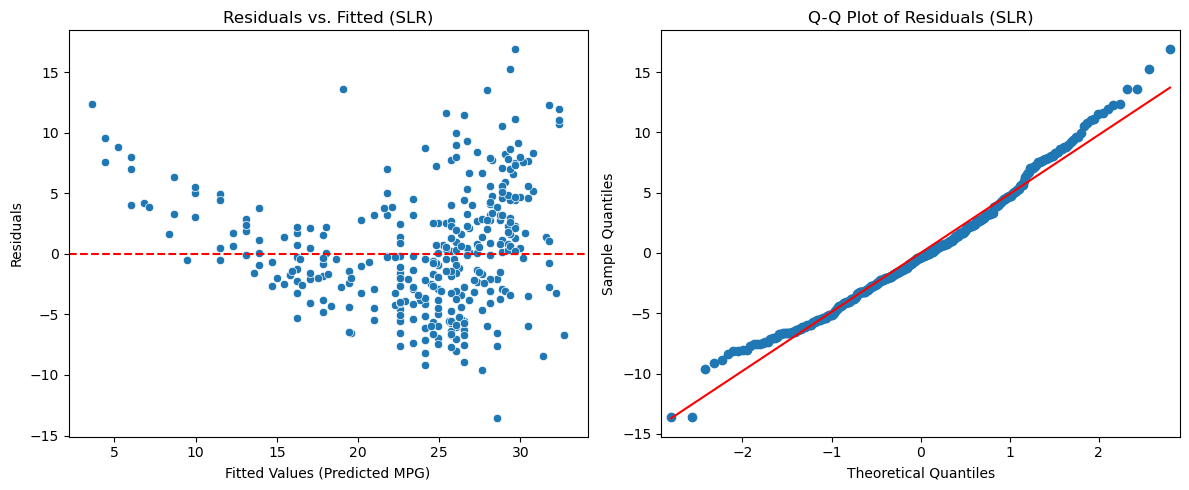

In [81]:
# --- SLR Diagnostic Plots ---
fitted_values_slr = model_slr.fittedvalues
residuals_slr = model_slr.resid

plt.figure(figsize=(12, 5))

# 1. Residuals vs. Fitted Plot
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values_slr, y=residuals_slr, ax=ax1)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_title('Residuals vs. Fitted (SLR)')
ax1.set_xlabel('Fitted Values (Predicted MPG)')
ax1.set_ylabel('Residuals')

# 2. Q-Q Plot
ax2 = plt.subplot(1, 2, 2)
sm.qqplot(residuals_slr, line='s', ax=ax2) # 's' = standardized line
ax2.set_title('Q-Q Plot of Residuals (SLR)')

plt.tight_layout()
plt.show()

#### SLR Diagnostic Analysis

1.  **Residuals vs. Fitted (Left):** This is a **problem**. The plot shows a clear **"U-shape"** (a non-linear pattern). This means our assumption of a *linear* relationship is wrong. Our model is **underfitting**.
2.  **Q-Q Plot (Right):** The residuals also peel away from the line at the tails, suggesting the errors are not perfectly normally distributed.

**Conclusion:** The SLR model is simple and significant, but it's **fundamentally flawed** because it fails the linearity assumption. We need a more complex model.

### Multiple Linear Regression - The "Full" Model

Let's build a "full" model that includes all potential predictors. This will be our starting point for backward elimination.

Our formula will be:
`mpg ~ cylinders + displacement + horsepower + weight + acceleration + model_year + C(origin)`

#### Handling Categorical Variables: `C(origin)`

The `origin` column is categorical (USA, Europe, Japan). If we just add `origin` to the model, `statsmodels` will treat it as a number, which is wrong.

By wrapping it in `C()`, we tell `statsmodels` to treat it as a **C**ategorical variable. It will automatically:
1.  Choose a "reference" level (by default, the lowest one, which in our case is Europe).
2.  Create "dummy variables" for the other levels.

The output will show coefficients for `C(origin)[T.japan]` and `C(origin)[T.usa]`. These coefficients represent the *difference in mpg* compared to the Europe, holding all other variables constant.

In [85]:
# Define and fit the "Full" MLR model
all_features = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + model_year + C(origin)'
model_full = smf.ols(all_features, data=mpg_clean).fit()

# Print the full summary table
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sat, 01 Nov 2025   Prob (F-statistic):          1.79e-139
Time:                        14:51:20   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -15.3246      4

#### Interpreting the Full Model

* **`Adj. R-squared`:** 0.818. A massive improvement! Our model now explains 81.8% of the variance.
* **Multicollinearity Warning:** `statsmodels` warns us: `The condition number is large... This might indicate that there is strong multicollinearity`.
* **P-Values:** Look at the `P>|t|` column. We see several variables with high p-values (>$0.05$):
    * `C(origin)[T.japan]` (p=0.694)
    * `cylinders` (p=0.128)
    * `horsepower` (p=0.185)
    * `acceleration` (p=0.421)

These variables are not statistically significant *in this specific model*. This is due to **multicollinearity**. `cylinders`, `horsepower`, and `acceleration` are all measuring the same thing (engine power) and are redundant.

### Backward Elimination

Our full model is bloated and unreliable. We will use **Backward Elimination** to simplify it, creating a "parsimonious" model that is both accurate and interpretable.

**The Process:**
1.  Fit the full model.
2.  Find the predictor with the **highest p-value** > $0.05$.
3.  Remove that predictor.
4.  Refit the model and go back to step 2.
5.  Stop when all remaining predictors have $p < 0.05$.


As a first step, we should remove `C(origin)[T.japan]` (p=0.694). However, this is one of the levels of `origin`, so we cannot just remove it. Instead, we can specify a different reference level than the default one to see if this improves things:

In [87]:
# Define and fit the "Full" MLR model
all_features = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + model_year + C(origin, Treatment(reference="usa"))'
model_full = smf.ols(all_features, data=mpg_clean).fit()

# Print the full summary table
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sat, 01 Nov 2025   Prob (F-statistic):          1.79e-139
Time:                        14:52:50   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

Great, this solved the problem for `origin`! We note that we have the same adjusted R-squared value, so we did not harm or improve the regressor.

We now have the following high p-values:

 * `cylinders` (p=0.128)
 * `horsepower` (p=0.185)
 * `acceleration` (p=0.421)

Let's remove `acceleration` next:

In [88]:
# Define and fit the "Full" MLR model
all_features = 'mpg ~ cylinders + displacement + horsepower + weight + model_year + C(origin, Treatment(reference="usa"))'
model_full = smf.ols(all_features, data=mpg_clean).fit()

# Print the full summary table
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     256.7
Date:                Sat, 01 Nov 2025   Prob (F-statistic):          1.49e-140
Time:                        14:54:35   Log-Likelihood:                -1020.8
No. Observations:                 392   AIC:                             2058.
Df Residuals:                     384   BIC:                             2089.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

The adjusted R-squared is the same, but we now have the following high p-values:

 * `cylinders` (p=0.118)

Let's remove `cylinders`:

In [89]:
# Define and fit the "Full" MLR model
all_features = 'mpg ~  displacement + horsepower + weight + model_year + C(origin, Treatment(reference="usa"))'
model_full = smf.ols(all_features, data=mpg_clean).fit()

# Print the full summary table
print(model_full.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     297.9
Date:                Sat, 01 Nov 2025   Prob (F-statistic):          2.80e-141
Time:                        14:55:29   Log-Likelihood:                -1022.0
No. Observations:                 392   AIC:                             2058.
Df Residuals:                     385   BIC:                             2086.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

The adjusted R-squared is a bit lower, but all p-values are below the threshold now!

### Final Model Interpretation

Now we have a **final, parsimonious model**.
* **`Adj. R-squared`:** 0.820. We removed two variables and our model's explanatory power is *still* just as high.
* **All p-values are < 0.05**. We can confidently interpret every coefficient.

**Final Coefficient Analysis:**
* **`weight`:** -0.0066. "For every 1lb increase in `weight`, `mpg` decreases by 0.0066, holding all other variables constant. (This is the net effect of increasing weight).
* **`model_year`:** 0.7749. "For each newer `model_year`, `mpg` increases by 0.78, holding all other variables constant. (Cars get more efficient over time).
* **`C(origin)[T.europe]`:** 2.5958. "A car from `Europe` gets **2.6 more mpg** than a car from the `USA`, holding all other variables constant".
* **`C(origin)[T.japan]`:** 2.7722. "A car from `Japan` gets **2.77 more mpg** than a car from the `USA`, holding all other variables constant".

### Final Diagnostic Check

Our p-values and coefficients are only reliable if this *final* model is valid. Let's check the residuals.

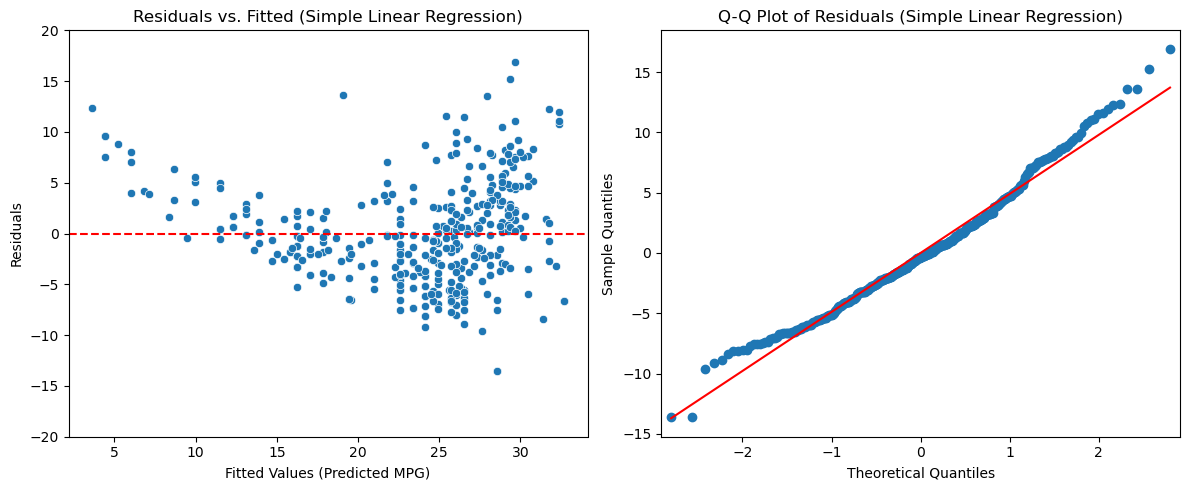

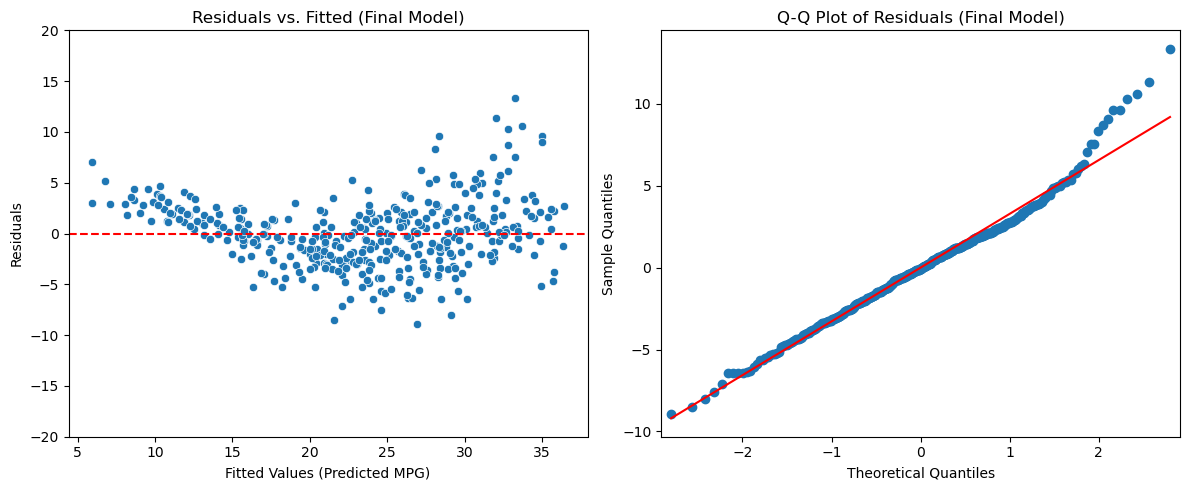

In [94]:
# --- SLR Diagnostic Plots ---
fitted_values_slr = model_slr.fittedvalues
residuals_slr = model_slr.resid

plt.figure(figsize=(12, 5))

# 1. Residuals vs. Fitted Plot
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values_slr, y=residuals_slr, ax=ax1)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_title('Residuals vs. Fitted (Simple Linear Regression)')
ax1.set_xlabel('Fitted Values (Predicted MPG)')
ax1.set_ylabel('Residuals')
ax1.set_ylim(-20, 20)

# 2. Q-Q Plot
ax2 = plt.subplot(1, 2, 2)
sm.qqplot(residuals_slr, line='s', ax=ax2) # 's' = standardized line
ax2.set_title('Q-Q Plot of Residuals (Simple Linear Regression)')

plt.tight_layout()
plt.show()

# --- Final Model Diagnostic Plots ---
fitted_values_final = model_full.fittedvalues
residuals_final = model_full.resid

plt.figure(figsize=(12, 5))

# 1. Residuals vs. Fitted Plot
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values_final, y=residuals_final, ax=ax1)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_title('Residuals vs. Fitted (Final Model)')
ax1.set_xlabel('Fitted Values (Predicted MPG)')
ax1.set_ylabel('Residuals')
ax1.set_ylim(-20, 20)

# 2. Q-Q Plot
ax2 = plt.subplot(1, 2, 2)
sm.qqplot(residuals_final, line='s', ax=ax2)
ax2.set_title('Q-Q Plot of Residuals (Final Model)')


plt.tight_layout()
plt.show()

1.  **Residuals vs. Fitted (Left):** This is a bit better. The problematic "U-shape" is still there but less pronounced.
2.  **Q-Q Plot (Right):** This also looks a bit improved, with the points falling closer to the normal-distribution line in the left part of the plot.

## Exercises

> Exercise 1
> 
> Consider the Titanic dataset. Calculate a linear regressor that predicts `Fare` values from `Survived`, `Pclass`, `Sex`, and `Age` values. Insert dummy variables where appropriate. Is the obtained regressor a good regressor? Which variables contribute significantly to the regression? Are there irrelevant variables? Eliminate these variables using the backward elimination technique. Discuss the meaning of the identified coefficients.

> Exercise 2
> 
> Consider the Titanic dataset. Calculate a linear regressor that predicts `Age` values from `Survived`, `Pclass`, `Sex`, and `Fare` values. Insert dummy variables where appropriate. Is the obtained regressor a good regressor? Is it a better or worse regressor than the one calculated in the previous exercise? Which variables contribute significantly to the regression? Are there irrelevant variables? Eliminate such variables using the backward elimination technique. Discuss the meaning of the identified coefficients.

## References

* Chapter 3 of \[1\]
* Parts of chapter 11 of \[2\]

\[1\] Heumann, Christian, and Michael Schomaker Shalabh. Introduction to statistics and data analysis. Springer International Publishing Switzerland, 2016.

\[2\] James, Gareth Gareth Michael. An introduction to statistical learning: with applications in Python, 2023.https://www.statlearning.com